# 處理 outliers
* 新增欄位註記
* outliers 或 NA 填補
    1. 平均數 (mean)
    2. 中位數 (median, or Q50)
    3. 最大/最小值 (max/min, Q100, Q0)
    4. 分位數 (quantile)

# [作業目標]
- 仿造範例的資料操作, 試著進行指定的離群值處理

# [作業重點]
- 計算 AMT_ANNUITY 的分位點 (q0 - q100) (Hint : np.percentile, In[3])
- 將 AMT_ANNUITY 的 NaN 用中位數取代 (Hint : q50, In[4])
- 將 AMT_ANNUITY 數值轉換到 -1 ~ 1 之間 (Hint : 參考範例, In[5])
- 將 AMT_GOOD_PRICE 的 NaN 用眾數取代 (In[6])

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
f_app = os.path.join(dir_data, 'application_train.csv')
print('Path of read in data: %s' % (f_app))
app_train = pd.read_csv(f_app)
app_train.head()

Path of read in data: ./data/application_train.csv


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 1. 列出 AMT_ANNUITY 的 q0 - q100
## 2.1 將 AMT_ANNUITY 中的 NAs 暫時以中位數填補
## 2.2 將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間
## 3. 將 AMT_GOOD_PRICE 的 NAs 以眾數填補


In [10]:
app_train['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [12]:
#檢查是否有null值，把isnull()加起來，如果>0就代表有。目前看來有12個null
app_train['AMT_ANNUITY'].isnull().sum()

12

## 1.列出 AMT_ANNUITY 的 q0 - q100

In [33]:
#取得「非null」的列，其['AMT_ANNUITY']
amtAnnuity = app_train[~app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']
qList = np.quantile(amtAnnuity,q= [i/100 for i in range(101)] )
qList
#app_train['AMT_ANNUITY']


array([  1615.5 ,   6182.91,   6750.  ,   7875.  ,   8703.  ,   9000.  ,
         9000.  ,   9553.5 ,  10125.  ,  10503.  ,  11074.5 ,  11430.  ,
        11970.  ,  12375.  ,  12838.5 ,  13302.  ,  13500.  ,  13500.  ,
        13896.  ,  14350.5 ,  14701.5 ,  15124.5 ,  15583.5 ,  15970.5 ,
        16209.  ,  16524.  ,  16852.5 ,  17109.  ,  17487.  ,  17806.5 ,
        18189.  ,  18643.5 ,  19102.5 ,  19417.5 ,  19836.  ,  20151.  ,
        20421.  ,  20853.  ,  21186.  ,  21609.  ,  21865.5 ,  22018.5 ,
        22342.5 ,  22527.  ,  22972.5 ,  23346.  ,  23719.5 ,  23931.  ,
        24259.5 ,  24583.59,  24903.  ,  25240.5 ,  25537.5 ,  25960.5 ,
        26217.  ,  26316.  ,  26640.  ,  26860.5 ,  27189.  ,  27558.  ,
        28062.  ,  28480.5 ,  28917.  ,  29340.  ,  29830.5 ,  30078.  ,
        30483.  ,  30897.  ,  31275.  ,  31630.5 ,  32004.  ,  32458.5 ,
        32895.  ,  33376.5 ,  33984.  ,  34596.  ,  35345.16,  35806.5 ,
        36328.5 ,  36747.  ,  37516.5 ,  37948.5 , 

# 2.將 AMT_ANNUITY 中的 NAs 暫時以中位數填補

In [40]:
#amtAnnuity.median()
#新增一個dataframe的column
app_train['AMT_ANNUITY_fillNaWithMedian'] = app_train['AMT_ANNUITY']
#app_train[app_train['AMT_ANNUITY'].isnull()]['AMT_ANNUITY_fillNaWithMedian']
app_train['AMT_ANNUITY_fillNaWithMedian'].fillna(amtAnnuity.median(),inplace=True)
#檢查是不是還有na
app_train['AMT_ANNUITY_fillNaWithMedian'].isnull().sum()

0

# 3.將 AMT_ANNUITY 的數值標準化至 -1 ~ 1 間

In [42]:
amtMax = app_train['AMT_ANNUITY_fillNaWithMedian'].max()
amtMin = app_train['AMT_ANNUITY_fillNaWithMedian'].min()
app_train['AMT_ANNUITY_fillNaWithMedian'] = ( app_train['AMT_ANNUITY_fillNaWithMedian'] - amtMin ) * (2/ (amtMax - amtMin)) -1

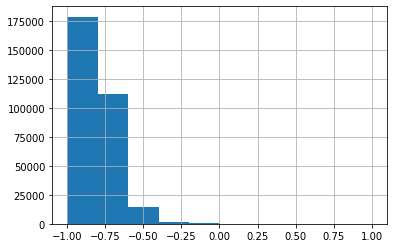

In [44]:
app_train['AMT_ANNUITY_fillNaWithMedian'].hist()

# 4.將 AMT_GOOD_PRICE 的 NAs 以眾數填補

In [106]:
#是否有NA?
print( app_train['AMT_GOODS_PRICE'].isnull().sum() )

278


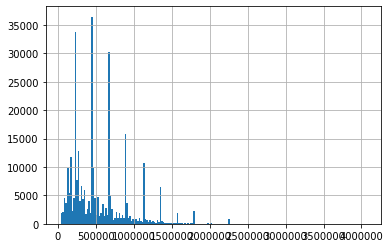

In [55]:
app_train['AMT_GOODS_PRICE'].hist(bins=200)

In [125]:
#計算眾數
amtGoodPriceMode = app_train['AMT_GOODS_PRICE'].mode()
amtGoodPriceMode[0]

450000.0

In [126]:
#複製一個Column
app_train['AMT_GOODS_PRICE_fillNaWithMode'] = app_train['AMT_GOODS_PRICE']

In [127]:
print( app_train['AMT_GOODS_PRICE_fillNaWithMode'].isnull().sum() )


278


In [128]:
app_train[ app_train['AMT_GOODS_PRICE_fillNaWithMode'].isnull() ][ 'AMT_GOODS_PRICE_fillNaWithMode'] 

724      NaN
5937     NaN
6425     NaN
6703     NaN
7647     NaN
7880     NaN
7995     NaN
10819    NaN
11287    NaN
13008    NaN
14699    NaN
15953    NaN
18935    NaN
19178    NaN
19921    NaN
21193    NaN
21338    NaN
21546    NaN
25391    NaN
26398    NaN
26736    NaN
27003    NaN
28201    NaN
29059    NaN
30164    NaN
30294    NaN
32143    NaN
36250    NaN
36721    NaN
39230    NaN
          ..
278747   NaN
279583   NaN
279997   NaN
281050   NaN
281653   NaN
282002   NaN
282270   NaN
282847   NaN
283159   NaN
285269   NaN
287092   NaN
287347   NaN
289793   NaN
291372   NaN
291384   NaN
292040   NaN
292120   NaN
294136   NaN
295295   NaN
298004   NaN
300107   NaN
302923   NaN
303603   NaN
303621   NaN
304621   NaN
304678   NaN
304784   NaN
305833   NaN
306126   NaN
306273   NaN
Name: AMT_GOODS_PRICE_fillNaWithMode, Length: 278, dtype: float64

In [129]:
print( app_train['AMT_GOODS_PRICE_fillNaWithMode'].isnull().sum() )

278


In [132]:
app_train['AMT_GOODS_PRICE_fillNaWithMode'].fillna(amtGoodPriceMode[0], inplace = True)


In [133]:
print( app_train['AMT_GOODS_PRICE_fillNaWithMode'].isnull().sum() )


0


## 以下是範例解題方式，就不管了

In [ ]:
"""
YOUR CODE HERE
"""
# 1: 計算 AMT_ANNUITY 的 q0 - q100
q_all =

pd.DataFrame({'q': list(range(101)),
              'value': q_all})

In [ ]:
# 2.1 將 NAs 以 q50 填補
print("Before replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

"""
Your Code Here
"""
q_50 = 
app_train.loc[app_train['AMT_ANNUITY'].isnull(),'AMT_ANNUITY'] = q_50

print("After replace NAs, numbers of row that AMT_ANNUITY is NAs: %i" % sum(app_train['AMT_ANNUITY'].isnull()))

### Hints: Normalize function (to -1 ~ 1)
$ y = 2*(\frac{x - min(x)}{max(x) - min(x)} - 0.5) $

In [ ]:
# 2.2 Normalize values to -1 to 1
print("== Original data range ==")
print(app_train['AMT_ANNUITY'].describe())

def normalize_value(x):
    """
    Your Code Here, compelete this function
    """
    
    return x

app_train['AMT_ANNUITY_NORMALIZED'] = normalize_value(app_train['AMT_ANNUITY'])

print("== Normalized data range ==")
app_train['AMT_ANNUITY_NORMALIZED'].describe()

In [ ]:
# 3
print("Before replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))

# 列出重複最多的數值
"""
Your Code Here
"""
value_most = 
print(value_most)

mode_goods_price = list(app_train['AMT_GOODS_PRICE'].value_counts().index)
app_train.loc[app_train['AMT_GOODS_PRICE'].isnull(), 'AMT_GOODS_PRICE'] = mode_goods_price[0]

print("After replace NAs, numbers of row that AMT_GOODS_PRICE is NAs: %i" % sum(app_train['AMT_GOODS_PRICE'].isnull()))